$\textbf{PROGRAMMING ASSIGNMENT}$
---

Data: https://archive.ics.uci.edu.

Instruction: Choose a dataset and perform a data storytelling, choose the proper data visualization, do not use words, your graphs must tell a story.


The chosen dataset is https://archive.ics.uci.edu/dataset/2/adult.

This dataset, titled "Adult", contains census data with multiple features per row with a binary value "Income" discerning whether or not a given person made above $50,000 per year.

In [1]:
from ucimlrepo import fetch_ucirepo
from matplotlib.ticker import FuncFormatter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
Y = adult.data.targets 

In [ ]:
data = pd.concat([X, Y], axis=1)
data.rename(columns={data.columns[-1]: 'income'}, inplace=True)
data['income_numeric'] = data['income'].apply(lambda x: 1 if x.strip().endswith('>50K') else 0)

In [ ]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_numeric
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1


In [ ]:
data.tail(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_numeric
48832,61,Private,89686,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,<=50K.,0
48833,31,Private,440129,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K.,0
48834,25,Private,350977,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K.,0
48835,48,Local-gov,349230,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K.,0
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.,0
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.,0
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.,0
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.,0


In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_numeric
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.160538
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.367108
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


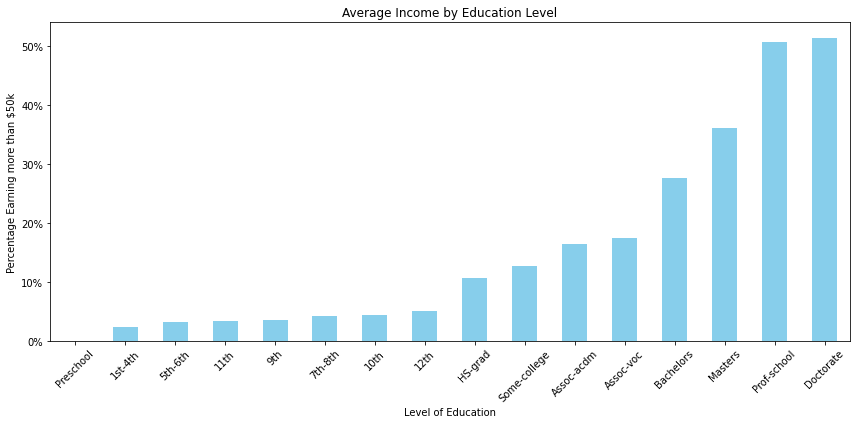

In [ ]:
plt.figure(figsize=(12, 6))
education_income_avg = data.groupby('education')['income_numeric'].mean().sort_values()
education_income_avg.plot(kind='bar', color='skyblue')

plt.title('Average Income by Education Level')

plt.xlabel('Level of Education')
plt.ylabel('Percentage Earning more than $50k')

plt.xticks(rotation=45)  # Too hard to read sideways lol

formatter = FuncFormatter(lambda x, _: '{:.0%}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


In [ ]:
data['income'] = data['income'].str.strip().replace({'<=50K.': '<=50K', '>50K.': '>50K'})
data['income_numeric'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

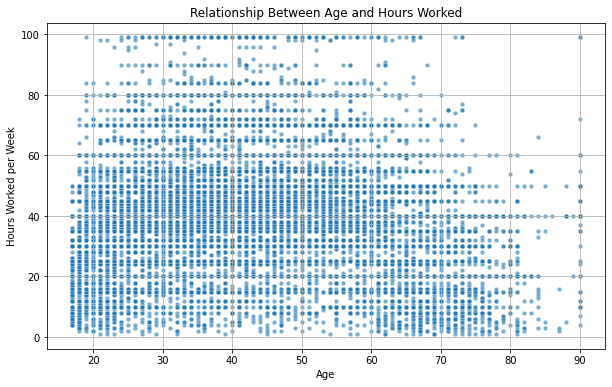

In [ ]:
plt.figure(figsize=(18, 10))
scatter_plot = sns.scatterplot(x='age', y='hours-per-week', s=20,
                               alpha=0.6, data=data)
plt.title('Relationship Between Age and Hours Worked')

plt.xlabel('Age')
plt.ylabel('Hours Worked per Week')

plt.grid(True)

plt.show()

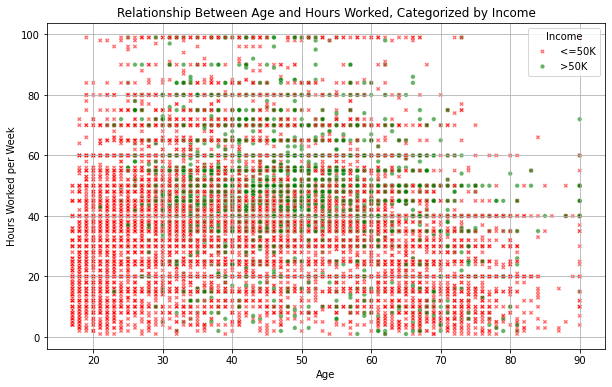

In [ ]:
palette_dict = {0: 'red', 1: 'green'}
markers_dict = {0: 'X', 1: 'o'}

plt.figure(figsize=(18, 10))
scatter_plot = sns.scatterplot(x='age', y='hours-per-week', hue='income_numeric', style='income_numeric', s=20,
                               palette=palette_dict, markers=markers_dict,
                               alpha=0.6, data=data)
plt.title('Relationship Between Age and Hours Worked, Categorized by Income')

plt.xlabel('Age')
plt.ylabel('Hours Worked per Week')

plt.grid(True)

plt.legend(title='Income', labels=['<=50K', '>50K'], loc='upper right')

handles, labels = scatter_plot.get_legend_handles_labels()
scatter_plot.legend(handles, ['<=50K', '>50K'], title='Income', loc='upper right')

plt.show()

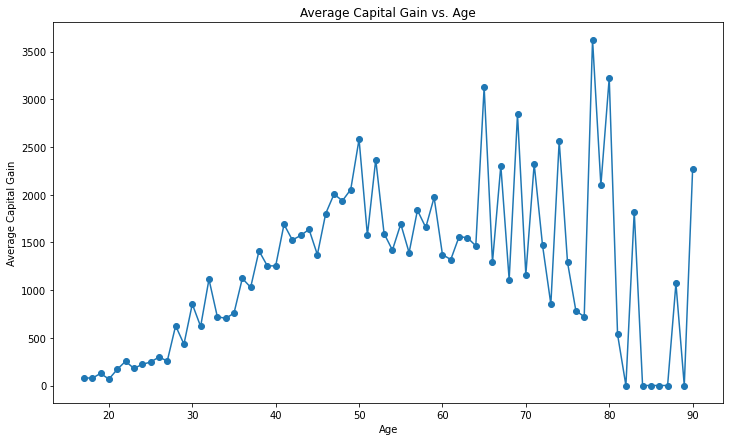

In [ ]:
age_capital_gain = data.groupby('age')['capital-gain'].mean().reset_index()

plt.figure(figsize=(12, 7))
plt.plot(age_capital_gain['age'], age_capital_gain['capital-gain'], marker='o', linestyle='-')
plt.title('Average Capital Gain vs. Age')

plt.xlabel('Age')
plt.ylabel('Average Capital Gain')

plt.show()

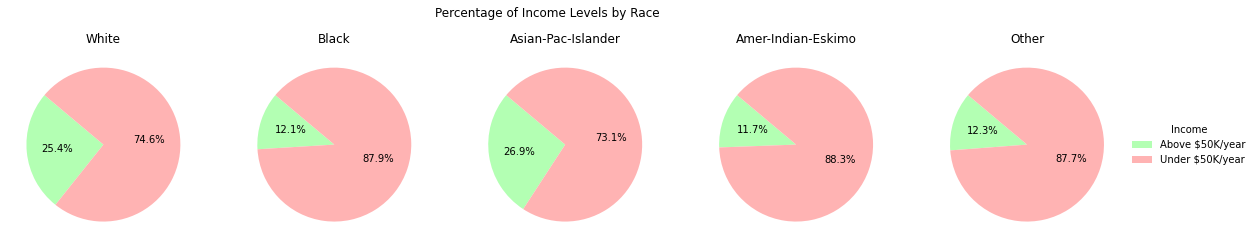

In [ ]:
races = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']

fig, axs = plt.subplots(1, 5, figsize=(25, 8))
fig.patch.set_facecolor('white')

colors = ['#b3ffb3', '#ffb3b3']

for i, race in enumerate(races):
    race_data = data[data['race'] == race]
    income_distribution = race_data['income'].value_counts(normalize=True)  

    if '>50K' not in income_distribution:
        income_distribution['>50K'] = 0
    if '<=50K' not in income_distribution:
        income_distribution['<=50K'] = 0
    
    sizes = [income_distribution['>50K'], income_distribution['<=50K']]

    wedges, texts, autotexts = axs[i].pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'{race}')

plt.legend(wedges, ['Above $50K/year', 'Under $50K/year'], title='Income', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.suptitle('Percentage of Income Levels by Race')
plt.show()

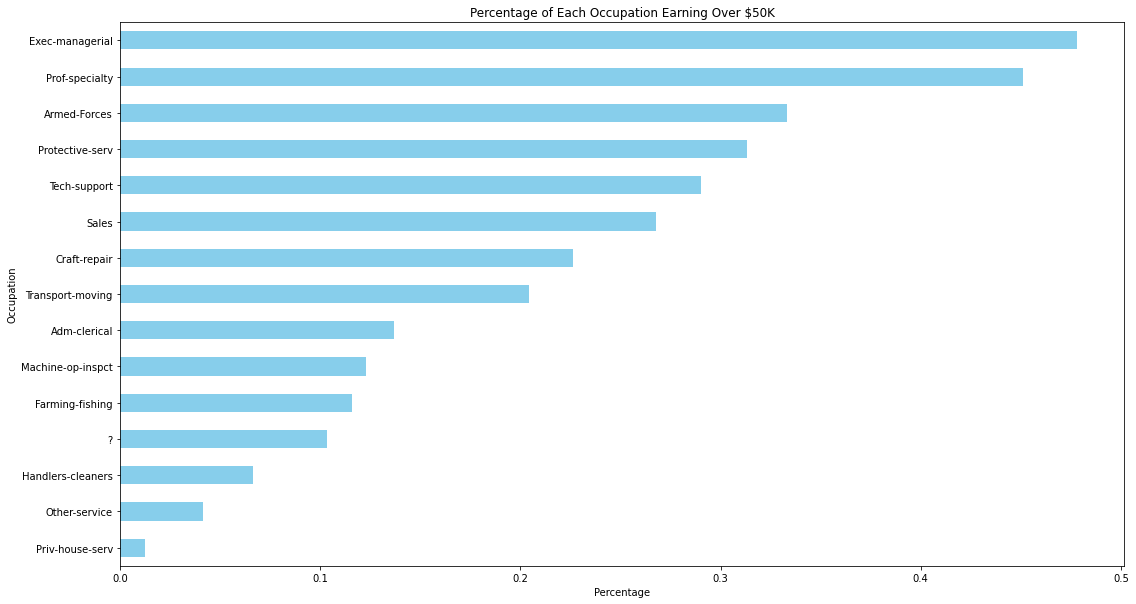

In [ ]:
percentage_over_50k = data[data['income'].str.contains('>50K', na=False)].groupby('occupation').size() / data.groupby('occupation').size()

counts = data.groupby(['occupation', 'income']).size().unstack().fillna(0)

plt.figure(figsize=(18, 10))
percentage_over_50k.sort_values().plot(kind='barh', color='skyblue')
plt.title('Percentage of Each Occupation Earning Over $50K')

plt.xlabel('Percentage')
plt.ylabel('Occupation')

plt.show()

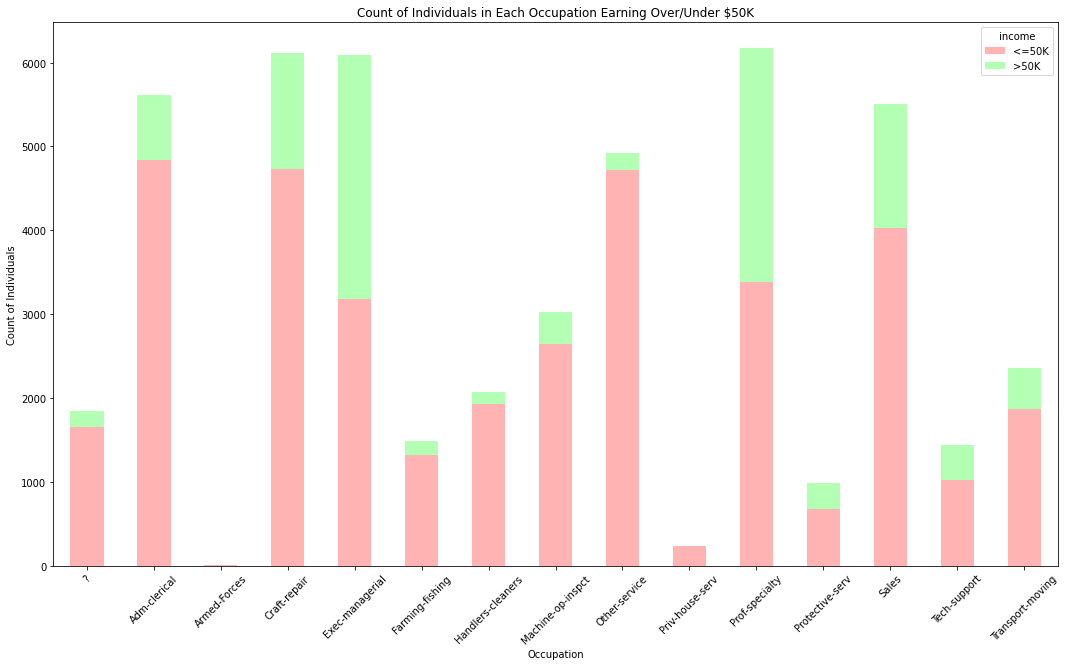

In [ ]:
counts.plot(kind='bar', stacked=True, color=['#ffb3b3', '#b3ffb3'], figsize=(18, 10))
plt.title('Count of Individuals in Each Occupation Earning Over/Under $50K')

plt.xlabel('Occupation')
plt.ylabel('Count of Individuals')
plt.xticks(rotation=45)

plt.show()